In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import os
import datetime as dt
import numpy as np
from copy import deepcopy
import seaborn as sns
from IPython.display import display

In [2]:
files = os.listdir("data")
# Sort dates
dates = [dt.datetime.strptime(re.findall(r'\d{4}-\d{2}-\d{2}',f)[0],'%Y-%m-%d') for f in files]
dates = sorted(dates,reverse=False)
dates = [i.strftime('%Y-%m-%d') for i in dates]

dfs_raw = {d: pd.read_csv(f'data/worldometers-{d}.tsv',sep="\t") for d in dates}

In [3]:
dfs = deepcopy(dfs_raw)
for df in dfs.values():
    for i in range(1, df.shape[1] - 1):
        # Fill nan in numerical data with 0
        df.iloc[:,i] = df.iloc[:,i].fillna(0)
    # Fill categorical nan with Other
    df.iloc[:,-1] = df.iloc[:,-1].fillna('Other')
    df.iloc[:,0] = df.iloc[:,0].fillna('Other')  

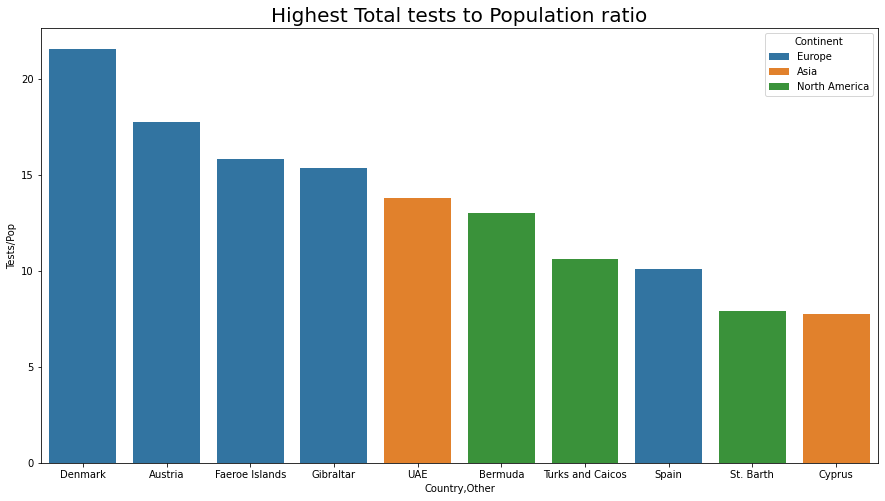

In [4]:
plt.figure(figsize=(15, 8))
data = deepcopy(dfs['2022-03-03'])
data['Tests/Pop'] = data['TotalTests'] / data['Population']
data = data.sort_values(by='Tests/Pop',ascending = False)
topten = data.head(10)
sns.barplot(x = topten['Country,Other'], y = topten['Tests/Pop'], hue=topten['Continent'],dodge=False)
plt.title('Highest Total tests to Population ratio',fontsize = 20)
plt.show()

### Comment  
- There are 5/10 countries in the top 10 belong to Europe.
- These countries seems to either have a small population or are very good at fighting against COVID 19

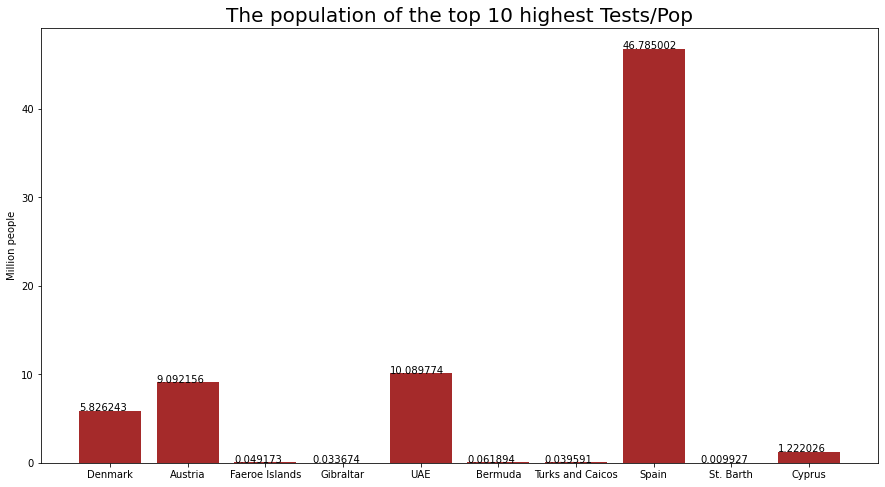

In [5]:
plt.figure(figsize=(15, 8))
bars = plt.bar(x = topten['Country,Other'], height = topten['Population']/10**6,color = 'brown')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(),yval+0.0005, yval)
plt.ylabel("Million people")
plt.title('The population of the top 10 highest Tests/Pop',fontsize = 20)
plt.show()

### Comment
- We can see that there are 5 in 10 countries have the population above 1 million.
- Spain has over 45 million people and still in the top 10.

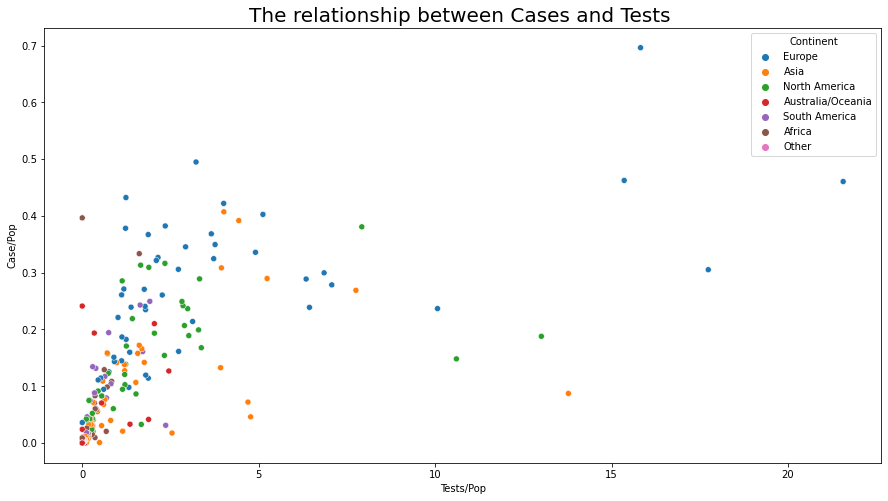

In [6]:
plt.figure(figsize=(15, 8))
data['Case/Pop'] = data['TotalCases'] / data['Population']
sns.scatterplot(x = data["Tests/Pop"], y = data["Case/Pop"], hue = data['Continent'])
plt.title("The relationship between Cases and Tests ", fontsize = 20)
plt.show()

### Comment 
- It seems to have a relationship between Cases/Pop and Tests/Pop, the more you tests, the more cases you have. However, the Cases/Pop ratio is increase dramatically when the Tests/Pop is below 3. 
- Europe has both the highest Cases/Pop ratio countries and the highest Tests/Pop ratio countries